# Praktikum 3


In [421]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import Lab3Functions as l3f


## Aufgabe 1 (Vorbereiten der Daten)

In [422]:
from Lab3Functions import import_data
weights, mvc, fatigue = import_data('\t')

In [423]:
# Hoch- und Tiefpassfilter definieren
def butterworth_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low')
    return signal.filtfilt(b, a, data)

# def lowpass_filter(data, cutoff, fs, order=4):
#     from scipy.signal import butter, filtfilt
#     nyquist = 0.5 * fs
#     normal_cutoff = cutoff / nyquist
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     filtered_data = filtfilt(b, a, data)
#     return filtered_data

# Hauptverarbeitungsschritte
def process_emg_data(data, fs=1000):
    # Offset entfernen
    data['emg'] = data['emg'] - np.mean(data['emg'])

    # Bandpassfiltern (20-450 Hz)
    data['filtered_emg'] = butterworth_filter(data['emg'], 20, 450, fs)

    # Signal gleichrichten (Absolutwert bilden)
    data['rectified_emg'] = np.abs(data['filtered_emg'])

    # Tiefpassfilter auf den Absolutwert anwenden (3 Hz)
    data['envelope'] = lowpass_filter(data['rectified_emg'], 3, fs)

    return data

### MVC von Carina

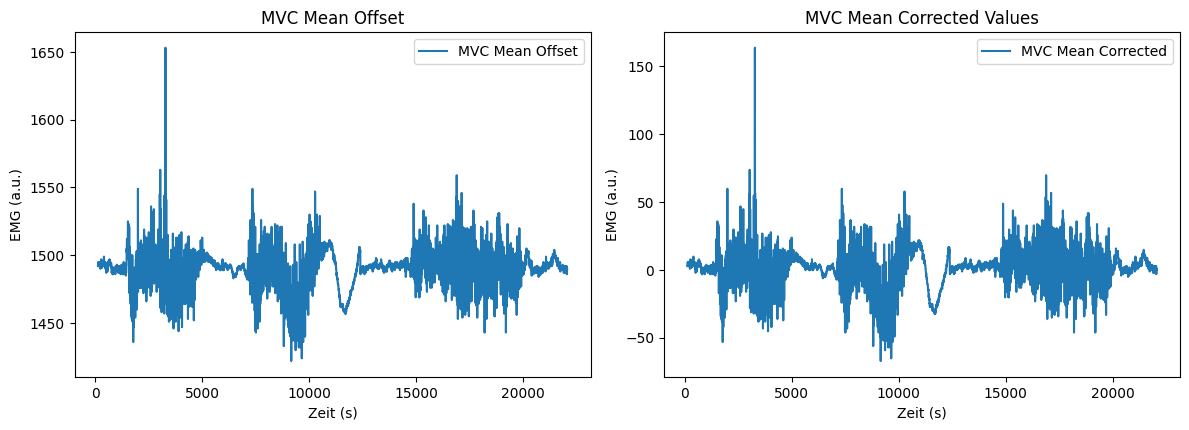

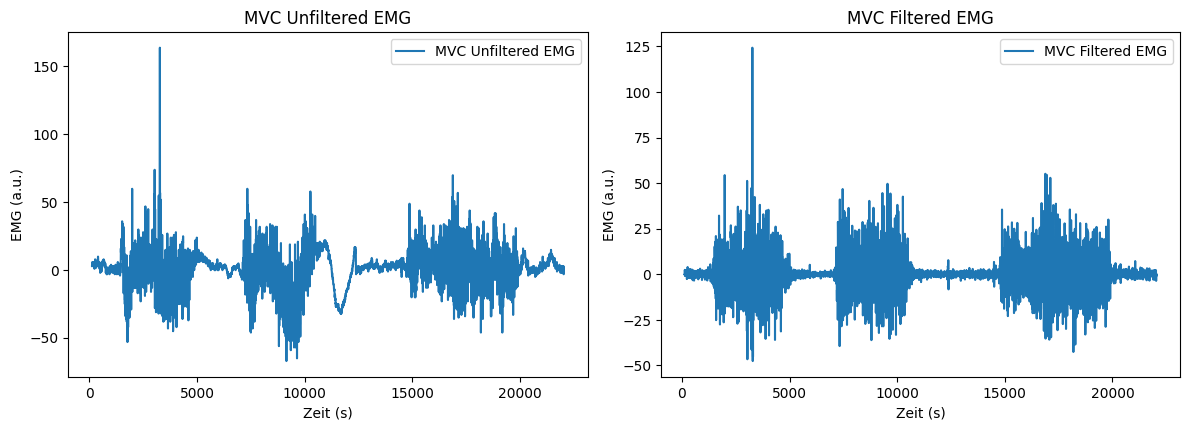

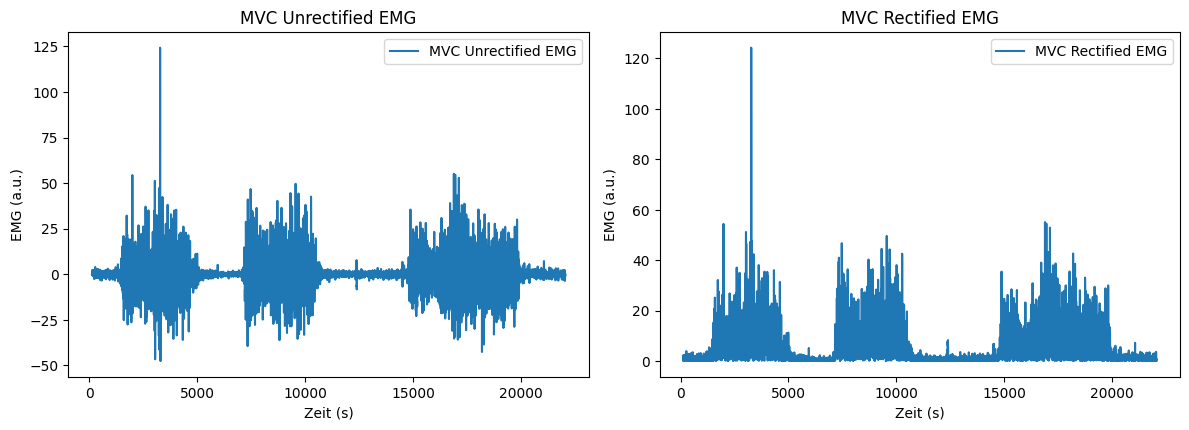

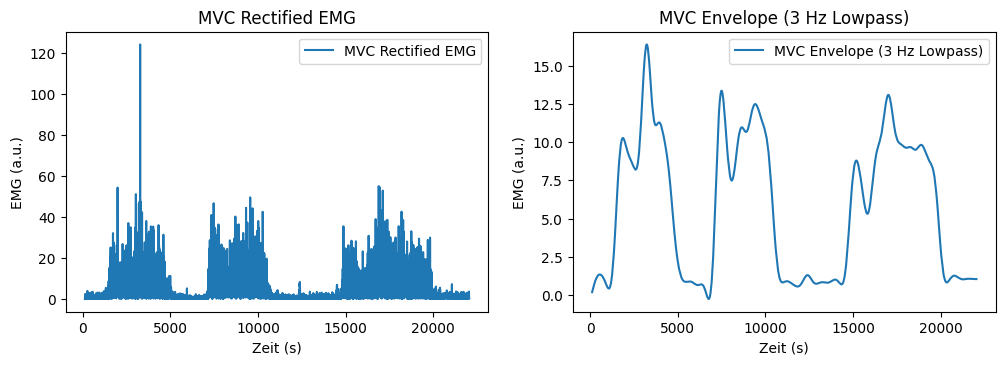

<Figure size 640x480 with 0 Axes>

In [424]:
# MVC Mean Offset und Mean Corrected Values berechnen und plotten
mvc_mean_offset = np.mean(mvc['emg'])
mvc['mean_corrected'] = mvc['emg'] - mvc_mean_offset

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvc['t'], mvc['emg'], label='MVC Mean Offset')
plt.title('MVC Mean Offset')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Mean Corrected')
plt.title('MVC Mean Corrected Values')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

# MVC Unfiltered und Filtered EMG plotten
mvc_filtered_emg = butterworth_filter(mvc['mean_corrected'], 20, 450, fs=1000)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvc['t'], mvc['mean_corrected'], label='MVC Unfiltered EMG')
plt.title('MVC Unfiltered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(mvc['t'], mvc_filtered_emg, label='MVC Filtered EMG')
plt.title('MVC Filtered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

# MVC Unrectified und Rectified EMG plotten
mvc_rectified_emg = np.abs(mvc_filtered_emg)
mvc_envelope = lowpass_filter(mvc_rectified_emg, 3, fs=1000)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvc['t'], mvc_filtered_emg, label='MVC Unrectified EMG')
plt.title('MVC Unrectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(mvc['t'], mvc_rectified_emg, label='MVC Rectified EMG')
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvc['t'], mvc_rectified_emg, label='MVC Rectified EMG')
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(mvc['t'], mvc_envelope, label='MVC Envelope (3 Hz Lowpass)')
plt.title('MVC Envelope (3 Hz Lowpass)')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

#teste 2

### MVC von Andreas

In [425]:
from importmvcpaulineandreas import import_dataAndreas
mvca  = import_dataAndreas('\t')

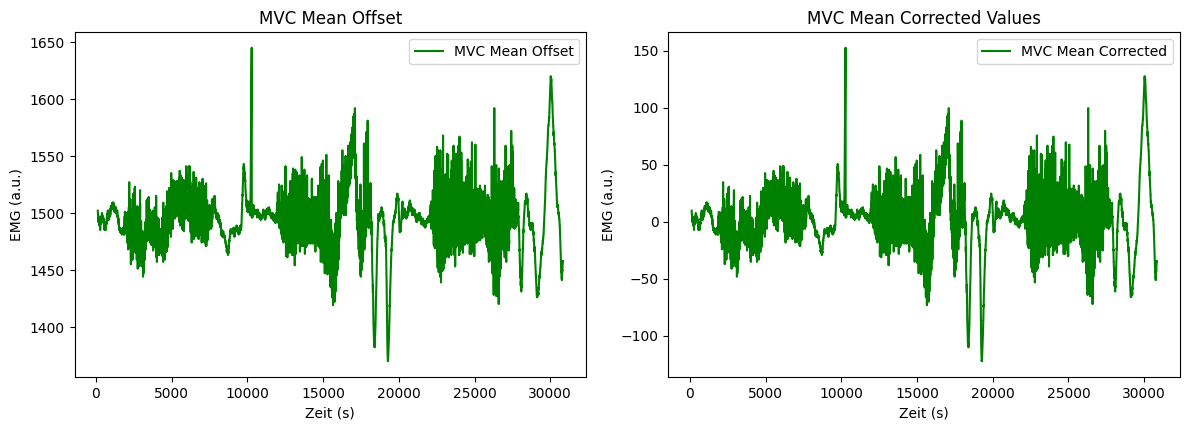

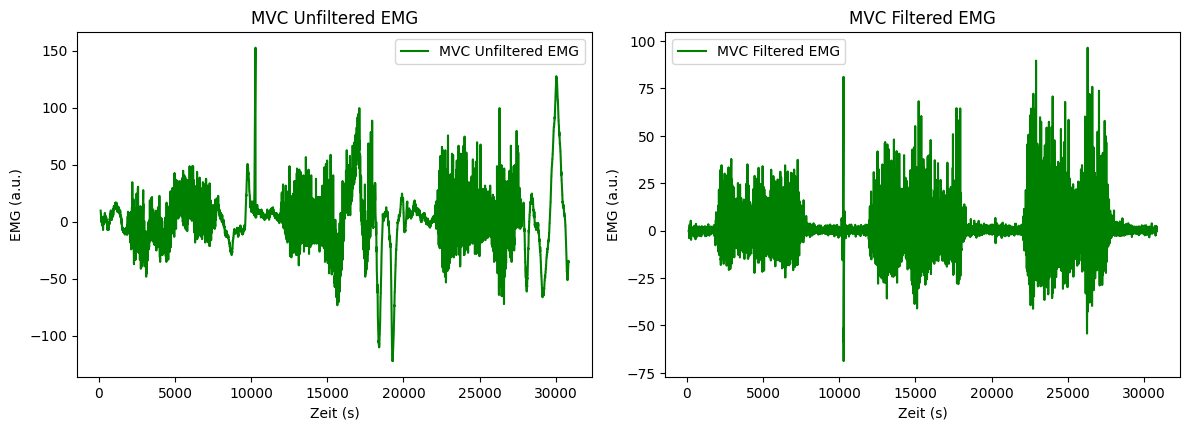

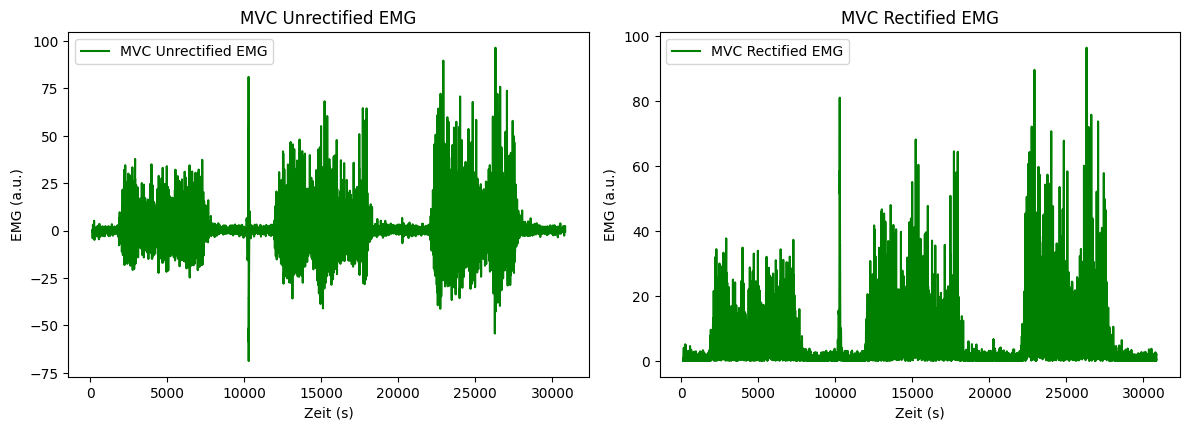

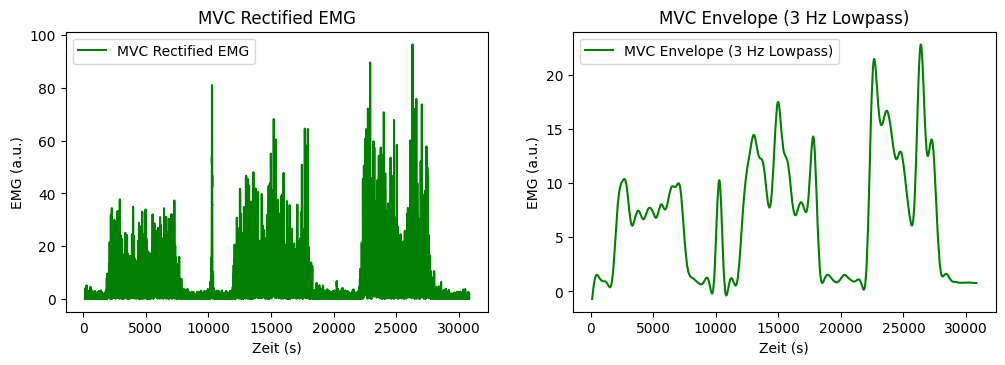

<Figure size 640x480 with 0 Axes>

In [426]:
# MVC Mean Offset und Mean Corrected Values berechnen und plotten
mvc_mean_offset = np.mean(mvca['emg'])
mvca['mean_corrected'] = mvca['emg'] - mvc_mean_offset

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvca['t'], mvca['emg'], label='MVC Mean Offset', color = "green")
plt.title('MVC Mean Offset')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(mvca['t'], mvca['mean_corrected'], label='MVC Mean Corrected', color = "green")
plt.title('MVC Mean Corrected Values')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

# MVC Unfiltered und Filtered EMG plotten
mvc_filtered_emg = butterworth_filter(mvca['mean_corrected'], 20, 450, fs=1000)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvca['t'], mvca['mean_corrected'], label='MVC Unfiltered EMG', color = "green")
plt.title('MVC Unfiltered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(mvca['t'], mvc_filtered_emg, label='MVC Filtered EMG',color = "green")
plt.title('MVC Filtered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

# MVC Unrectified und Rectified EMG plotten
mvc_rectified_emg = np.abs(mvc_filtered_emg)
mvc_envelope = lowpass_filter(mvc_rectified_emg, 3, fs=1000)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvca['t'], mvc_filtered_emg, label='MVC Unrectified EMG', color = "green")
plt.title('MVC Unrectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(mvca['t'], mvc_rectified_emg, label='MVC Rectified EMG', color = "green")
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvca['t'], mvc_rectified_emg, label='MVC Rectified EMG', color = "green")
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(mvca['t'], mvc_envelope, label='MVC Envelope (3 Hz Lowpass)', color = "green")
plt.title('MVC Envelope (3 Hz Lowpass)')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

#teste 2

### MVC von Pauline

In [427]:
from importmvcpaulineandreas import import_dataPauline
mvcp = import_dataPauline('\t')

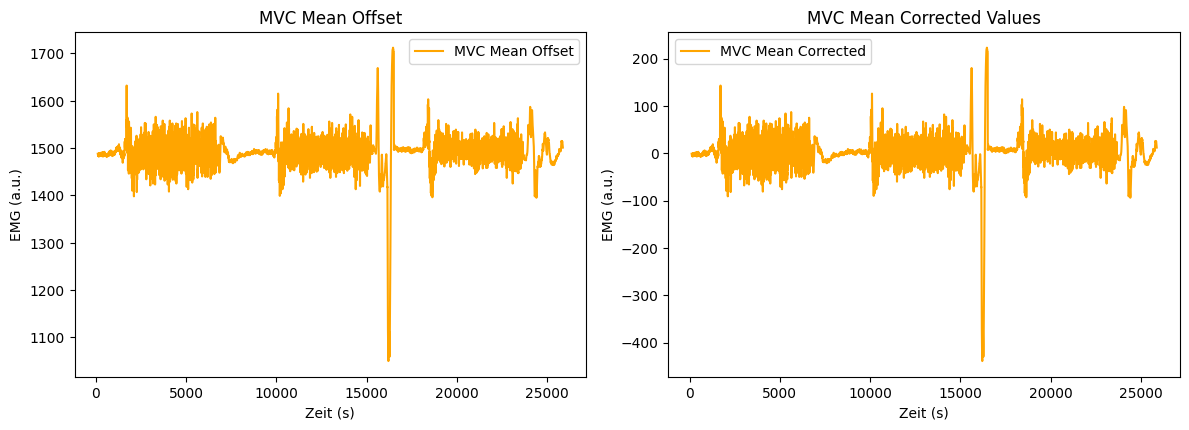

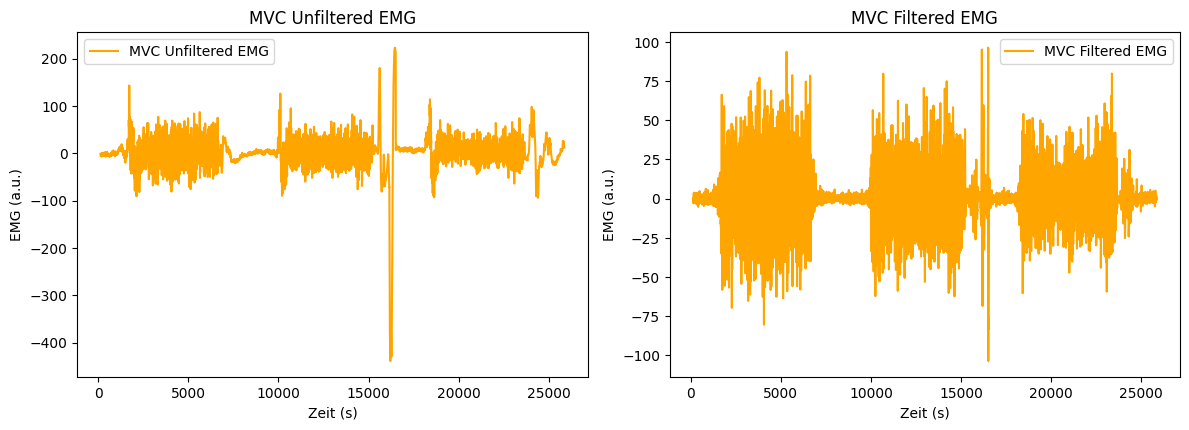

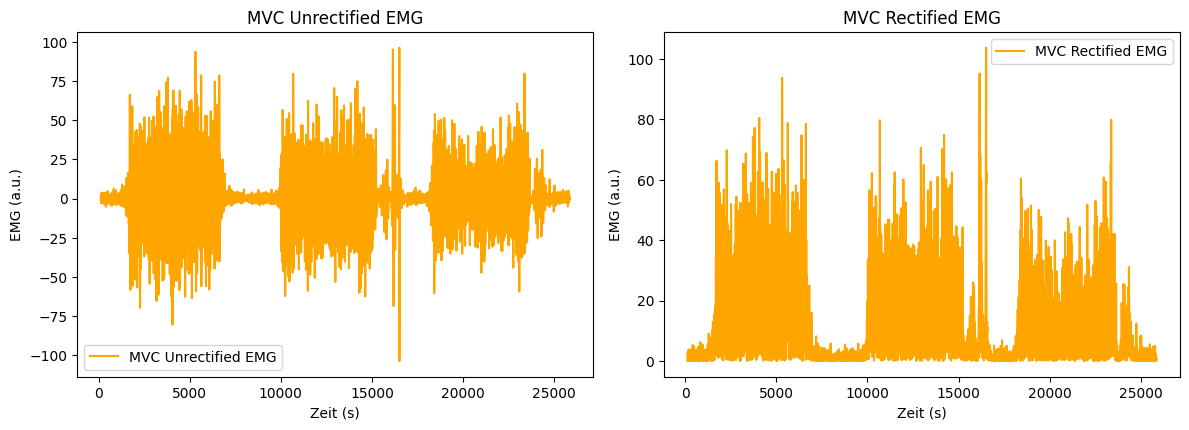

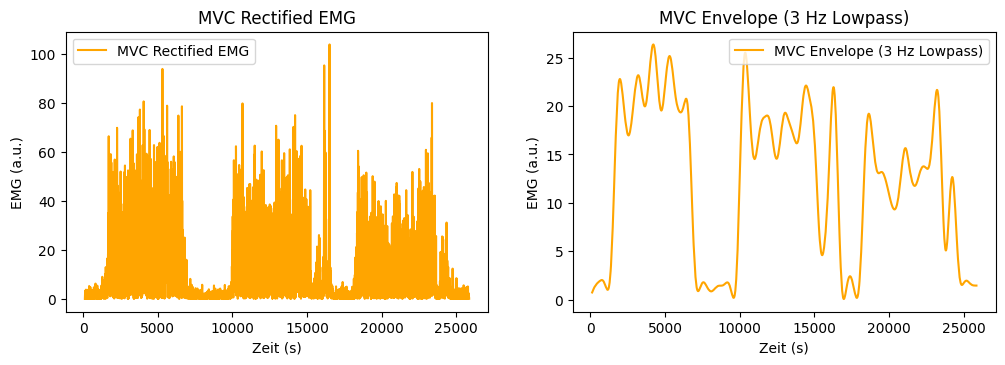

<Figure size 640x480 with 0 Axes>

In [428]:
# MVC Mean Offset und Mean Corrected Values berechnen und plotten
mvc_mean_offset = np.mean(mvcp['emg'])
mvcp['mean_corrected'] = mvcp['emg'] - mvc_mean_offset

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvcp['t'], mvcp['emg'], label='MVC Mean Offset', color = "orange")
plt.title('MVC Mean Offset')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(mvcp['t'], mvcp['mean_corrected'], label='MVC Mean Corrected', color = "orange")
plt.title('MVC Mean Corrected Values')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

# MVC Unfiltered und Filtered EMG plotten
mvc_filtered_emg = butterworth_filter(mvcp['mean_corrected'], 20, 450, fs=1000)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvcp['t'], mvcp['mean_corrected'], label='MVC Unfiltered EMG', color = "orange")
plt.title('MVC Unfiltered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(mvcp['t'], mvc_filtered_emg, label='MVC Filtered EMG',color = "orange")
plt.title('MVC Filtered EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

# MVC Unrectified und Rectified EMG plotten
mvc_rectified_emg = np.abs(mvc_filtered_emg)
mvc_envelope = lowpass_filter(mvc_rectified_emg, 3, fs=1000)

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvcp['t'], mvc_filtered_emg, label='MVC Unrectified EMG', color = "orange")
plt.title('MVC Unrectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(mvcp['t'], mvc_rectified_emg, label='MVC Rectified EMG', color = "orange")
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(mvcp['t'], mvc_rectified_emg, label='MVC Rectified EMG', color = "orange")
plt.title('MVC Rectified EMG')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(mvcp['t'], mvc_envelope, label='MVC Envelope (3 Hz Lowpass)', color = "orange")
plt.title('MVC Envelope (3 Hz Lowpass)')
plt.xlabel('Zeit (s)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()


## Aufgabe 3

In [457]:
fs = 1000
emg_signal = mvc['emg'] - np.mean(mvc['emg'])
time = mvc['t'].values  # Zeitachse
filtered_emg = butterworth_filter(emg_signal, lowcut=20, highcut=450, fs=fs)
segment_duration = 0.5  # Länge des Segments in Sekunden
samples_per_segment = int(segment_duration * fs)


### a)

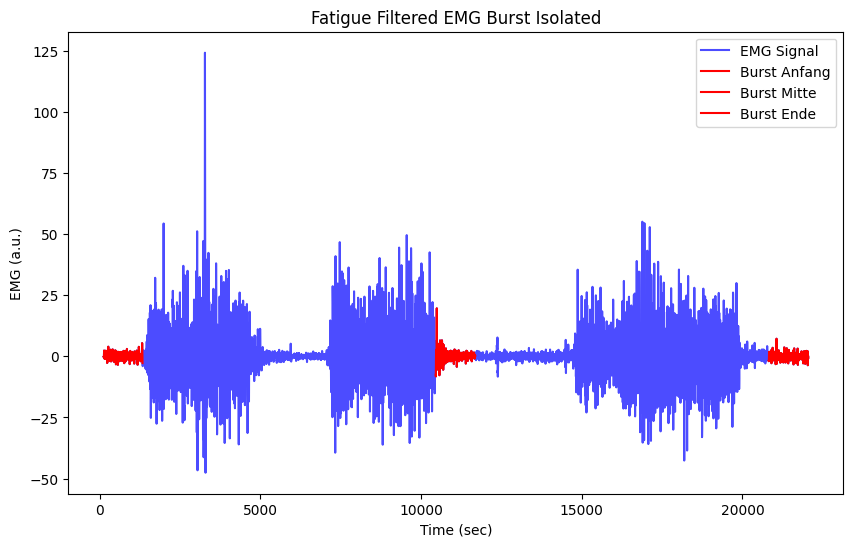

In [458]:
mvc['filtered_emg'] = filtered_emg

# Indizes der Segmente für Anfang, Mitte und Ende
start_idx = 0
middle_idx = len(mvc['filtered_emg']) // 2 - samples_per_segment // 2
end_idx = len(mvc['filtered_emg']) - samples_per_segment

start_segment = mvc['filtered_emg'][start_idx:start_idx + samples_per_segment]
middle_segment = mvc['filtered_emg'][middle_idx:middle_idx + samples_per_segment]
end_segment = mvc['filtered_emg'][end_idx:end_idx + samples_per_segment]

# Zeitachsen für die Segmente
start_time = mvc['t'][start_idx:start_idx + samples_per_segment]
middle_time = mvc['t'][middle_idx:middle_idx + samples_per_segment]
end_time = mvc['t'][end_idx:end_idx + samples_per_segment]

# 3. Plotten des gesamten Signals mit hervorgehobenen Bursts
plt.figure(figsize=(10, 6))
plt.plot(mvc['t'], mvc['filtered_emg'], label='EMG Signal', color='blue', alpha=0.7)

# Markieren der Intervalle
plt.plot(start_time, start_segment, color='red', label='Burst Anfang')
plt.plot(middle_time, middle_segment, color='red', label='Burst Mitte')
plt.plot(end_time, end_segment, color='red', label='Burst Ende')

plt.title('Fatigue Filtered EMG Burst Isolated')
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
plt.legend()
plt.show()


### b)

In [440]:
burst_start_idx = int(4 * fs)  # Startindex
burst_end_idx = burst_start_idx + int(1.5 * fs)  # Endindex

start_idx = burst_start_idx
start_segment = filtered_emg[start_idx:start_idx + samples_per_segment]

# Mitte des Bursts
middle_idx = burst_start_idx + (burst_end_idx - burst_start_idx) // 2 - samples_per_segment // 2
middle_segment = filtered_emg[middle_idx:middle_idx + samples_per_segment]

# Ende des Bursts
end_idx = burst_end_idx - samples_per_segment
end_segment = filtered_emg[end_idx:end_idx + samples_per_segment]

# 5. Berechnung der spektralen Leistungsdichte
start_power, start_freqs = l3f.get_power(start_segment, fs)
middle_power, middle_freqs = l3f.get_power(middle_segment, fs)
end_power, end_freqs = l3f.get_power(end_segment, fs)

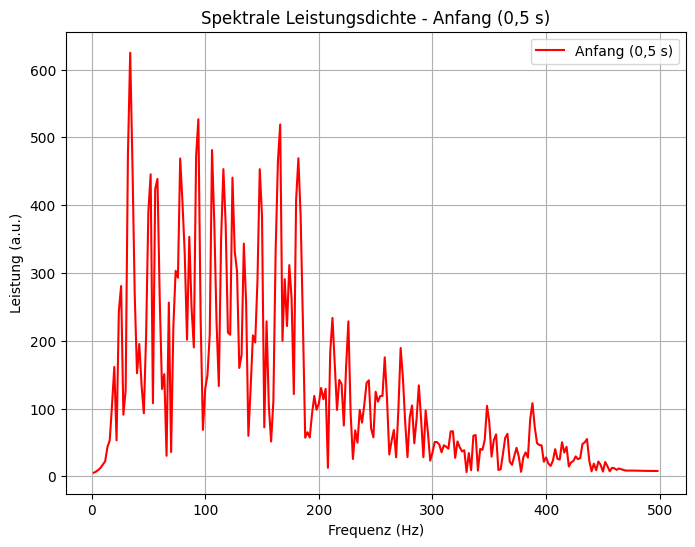

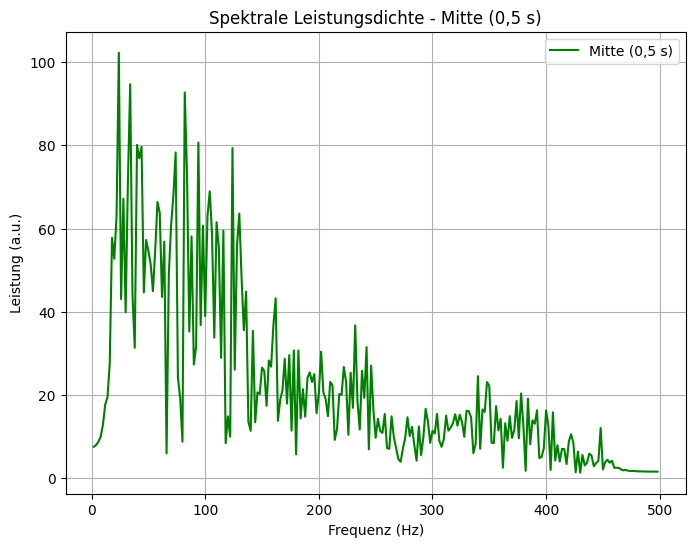

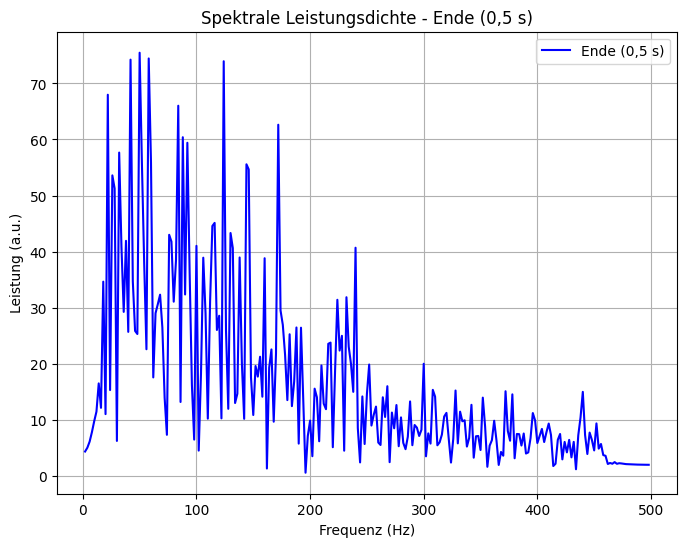

In [441]:
# Plot für das Segment "Anfang"
plt.figure(figsize=(8, 6))
plt.plot(start_freqs, start_power, color='red', label='Anfang (0,5 s)')
plt.title('Spektrale Leistungsdichte - Anfang (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Plot für das Segment "Mitte"
plt.figure(figsize=(8, 6))
plt.plot(middle_freqs, middle_power, color='green', label='Mitte (0,5 s)')
plt.title('Spektrale Leistungsdichte - Mitte (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Plot für das Segment "Ende"
plt.figure(figsize=(8, 6))
plt.plot(end_freqs, end_power, color='blue', label='Ende (0,5 s)')
plt.title('Spektrale Leistungsdichte - Ende (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()


### c)

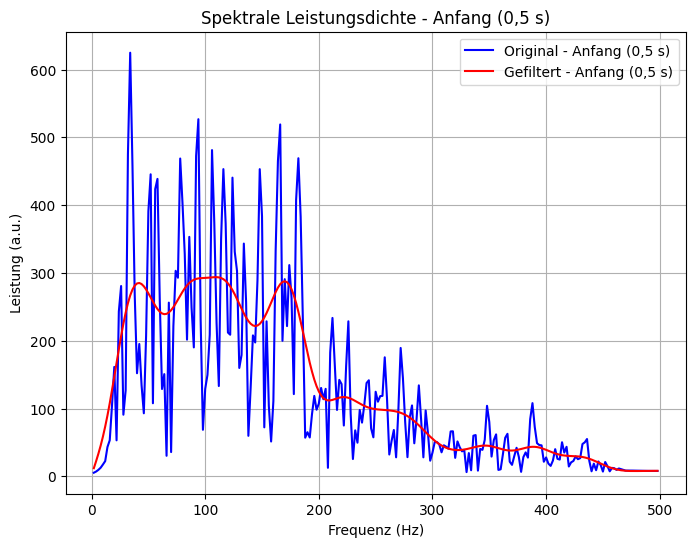

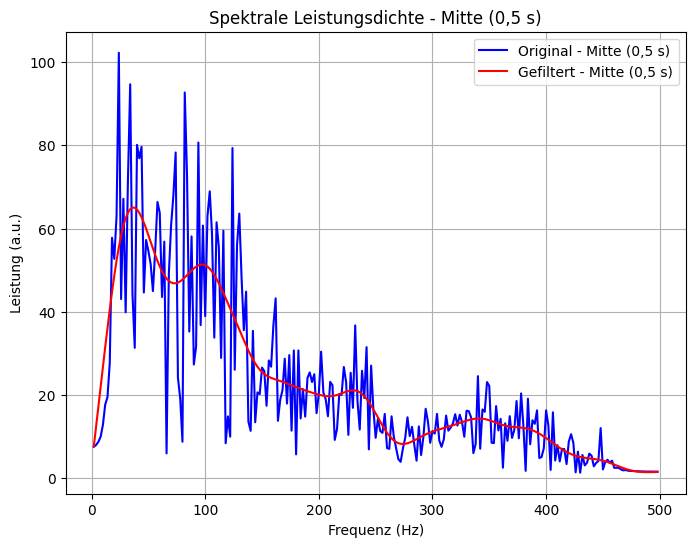

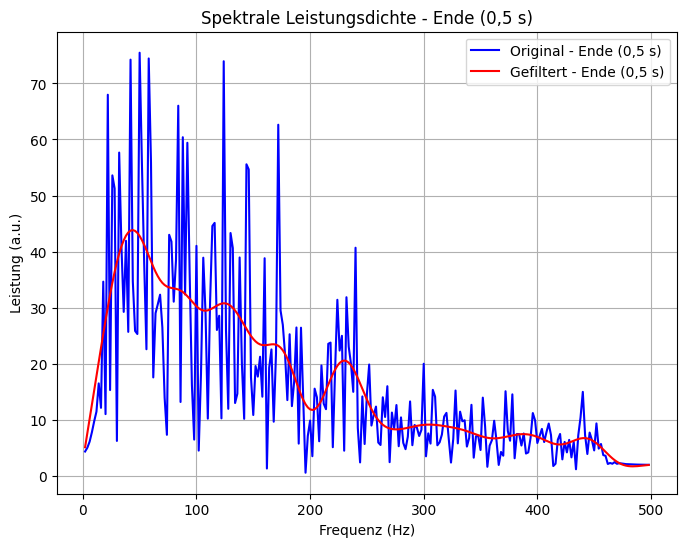

In [442]:
# Filtereinstellungen
cutoff_freq = 40  # Cutoff-Frequenz für den Lowpass-Filter

filtered_start_power = lowpass_filter(start_power, cutoff=cutoff_freq, fs=fs)
filtered_middle_power = lowpass_filter(middle_power, cutoff=cutoff_freq, fs=fs)
filtered_end_power = lowpass_filter(end_power, cutoff=cutoff_freq, fs=fs)

# 7. Plotten der gefilterten spektralen Leistungsdichte für die drei Segmente

# Plot für das Segment "Anfang"
plt.figure(figsize=(8, 6))
plt.plot(start_freqs, start_power, color='blue', label='Original - Anfang (0,5 s)')
plt.plot(start_freqs, filtered_start_power, color='red', label='Gefiltert - Anfang (0,5 s)')
plt.title('Spektrale Leistungsdichte - Anfang (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Plot für das Segment "Mitte"
plt.figure(figsize=(8, 6))
plt.plot(middle_freqs, middle_power, color='blue', label='Original - Mitte (0,5 s)')
plt.plot(middle_freqs, filtered_middle_power, color='red', label='Gefiltert - Mitte (0,5 s)')
plt.title('Spektrale Leistungsdichte - Mitte (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Plot für das Segment "Ende"
plt.figure(figsize=(8, 6))
plt.plot(end_freqs, end_power, color='blue', label='Original - Ende (0,5 s)')
plt.plot(end_freqs, filtered_end_power, color='red', label='Gefiltert - Ende (0,5 s)')
plt.title('Spektrale Leistungsdichte - Ende (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()


## 4.

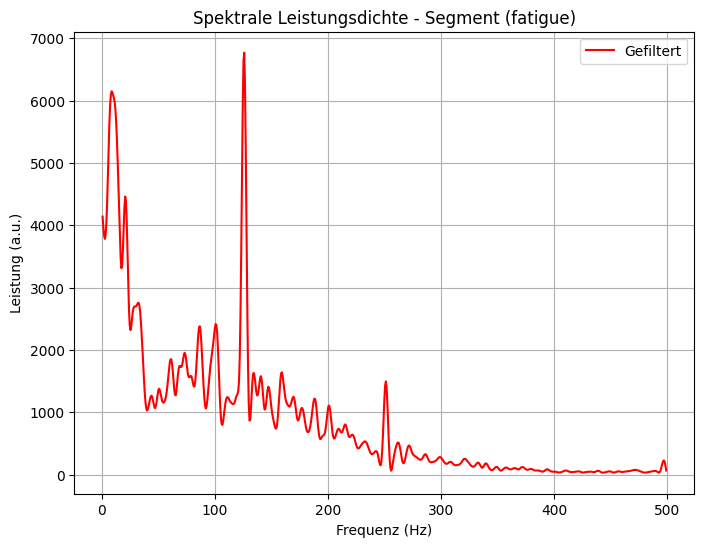

In [460]:
import matplotlib.pyplot as plt
from Lab3Functions import get_power  # Importiere die Funktionen

# Filtereinstellungen
cutoff_freq = 100  # Cutoff-Frequenz
fs = 1000          # Samplingfrequenz

# Segment aus fatigue-Daten definieren
start_idx = int(4 * fs)  # Startindex
end_idx = start_idx + int(1.5 * fs)  # Endindex
segment = fatigue['emg'][start_idx:end_idx]  # Das Segment aus fatigue['emg']

# Spektrale Leistungsdichte berechnen
power, freqs = get_power(segment, fs)

# Gefilterte Leistungsdichte berechnen
filtered_power = lowpass_filter(power, cutoff=cutoff_freq, fs=fs)

# Plot der gefilterten spektralen Leistungsdichte
plt.figure(figsize=(8, 6))
plt.plot(freqs, filtered_power, color='red', label='Gefiltert')
plt.title('Spektrale Leistungsdichte - Segment (fatigue)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()


Median Frequency: 89.57219251336899


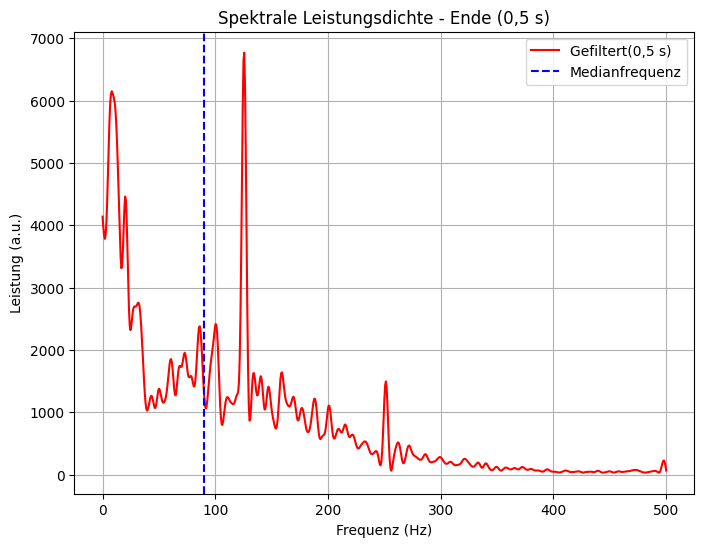

In [461]:
from scipy.integrate import cumulative_trapezoid
freqs = np.linspace(0, fs / 2, len(filtered_power))

# Berechnung der Fläche unter der Kurve
area = cumulative_trapezoid(filtered_power, freqs, initial=0)

# Gesamte Leistung (Total Power)
total_power = area[-1]

# Medianfrequenz berechnen
median_freq = freqs[np.where(area >= total_power / 2)[0][0]]

print("Median Frequency:", median_freq)

# plot mit medianfrequenz
plt.figure(figsize=(8, 6))
plt.plot(freqs, filtered_power, color='red', label='Gefiltert(0,5 s)')
plt.axvline(median_freq, color='blue', linestyle='--', label='Medianfrequenz')
plt.title('Spektrale Leistungsdichte - Ende (0,5 s)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()



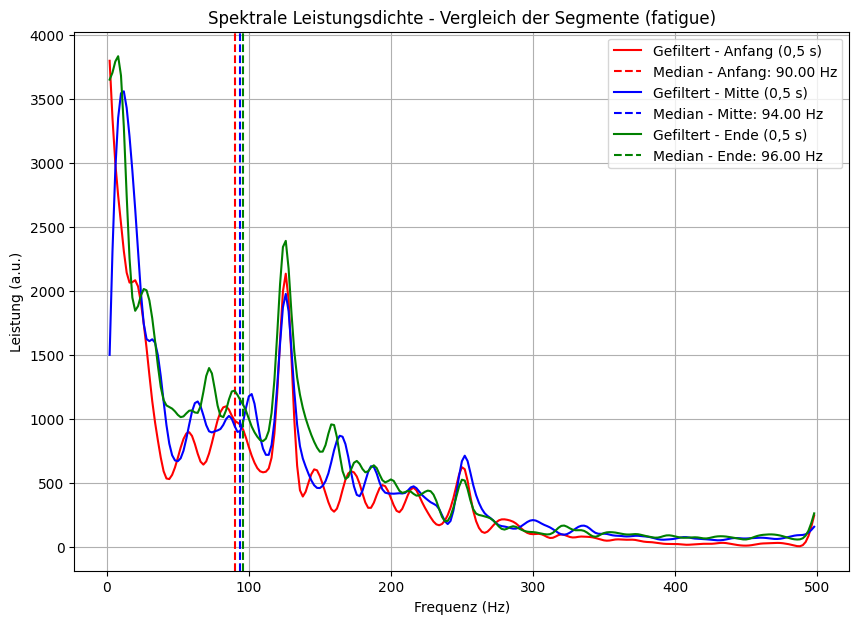

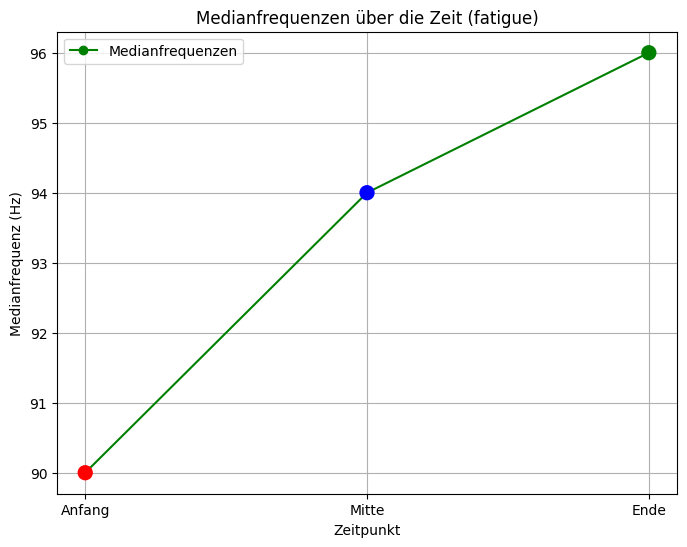

In [462]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from Lab3Functions import get_power  # Importiere deine Funktionen

# Filtereinstellungen
cutoff_freq = 100  # Cutoff-Frequenz für den Lowpass-Filter
filter_order = 2   # Reduzierte Filterordnung
fs = 1000          # Samplingfrequenz in Hz
samples_per_segment = 500  # Anzahl der Samples pro Segment

# Start-, Mitte- und Endsegmente aus fatigue['emg'] definieren
burst_start_idx = int(4 * fs)  # Startindex
burst_end_idx = burst_start_idx + int(1.5 * fs)  # Endindex

start_idx = burst_start_idx
start_segment = fatigue['emg'][start_idx:start_idx + samples_per_segment]

middle_idx = burst_start_idx + (burst_end_idx - burst_start_idx) // 2 - samples_per_segment // 2
middle_segment = fatigue['emg'][middle_idx:middle_idx + samples_per_segment]

end_idx = burst_end_idx - samples_per_segment
end_segment = fatigue['emg'][end_idx:end_idx + samples_per_segment]

# Spektrale Leistungsdichte für die Segmente berechnen
start_power, start_freqs = get_power(start_segment, fs)
middle_power, middle_freqs = get_power(middle_segment, fs)
end_power, end_freqs = get_power(end_segment, fs)

# Gefilterte spektrale Leistungsdichte mit neuen Filtereinstellungen
filtered_start_power = lowpass_filter(start_power, cutoff=cutoff_freq, fs=fs, order=filter_order)
filtered_middle_power = lowpass_filter(middle_power, cutoff=cutoff_freq, fs=fs, order=filter_order)
filtered_end_power = lowpass_filter(end_power, cutoff=cutoff_freq, fs=fs, order=filter_order)

# Berechnung der Medianfrequenzen für die Segmente
def calculate_median_frequency(power, freqs):
    area = cumulative_trapezoid(power, freqs, initial=0)
    total_power = area[-1]
    median_freq = freqs[np.where(area >= total_power / 2)[0][0]]
    return median_freq

median_freq_start = calculate_median_frequency(filtered_start_power, start_freqs)
median_freq_middle = calculate_median_frequency(filtered_middle_power, middle_freqs)
median_freq_end = calculate_median_frequency(filtered_end_power, end_freqs)

# Gemeinsamer Plot für die Segmente
plt.figure(figsize=(10, 7))
plt.plot(start_freqs, filtered_start_power, color='red', label='Gefiltert - Anfang (0,5 s)')
plt.axvline(median_freq_start, color='red', linestyle='--', label=f'Median - Anfang: {median_freq_start:.2f} Hz')
plt.plot(middle_freqs, filtered_middle_power, color='blue', label='Gefiltert - Mitte (0,5 s)')
plt.axvline(median_freq_middle, color='blue', linestyle='--', label=f'Median - Mitte: {median_freq_middle:.2f} Hz')
plt.plot(end_freqs, filtered_end_power, color='green', label='Gefiltert - Ende (0,5 s)')
plt.axvline(median_freq_end, color='green', linestyle='--', label=f'Median - Ende: {median_freq_end:.2f} Hz')
plt.title('Spektrale Leistungsdichte - Vergleich der Segmente (fatigue)')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung (a.u.)')
plt.legend()
plt.grid()
plt.show()

# Medianfrequenzen über die Zeit
median_frequencies = [median_freq_start, median_freq_middle, median_freq_end]
time_points = ['Anfang', 'Mitte', 'Ende']

plt.figure(figsize=(8, 6))
plt.plot(time_points, median_frequencies, marker='o', color='green', label='Medianfrequenzen')
plt.scatter(time_points, median_frequencies, color=['red', 'blue', 'green'], s=100, zorder=3)
plt.title('Medianfrequenzen über die Zeit (fatigue)')
plt.xlabel('Zeitpunkt')
plt.ylabel('Medianfrequenz (Hz)')
plt.grid()
plt.legend()
plt.show()


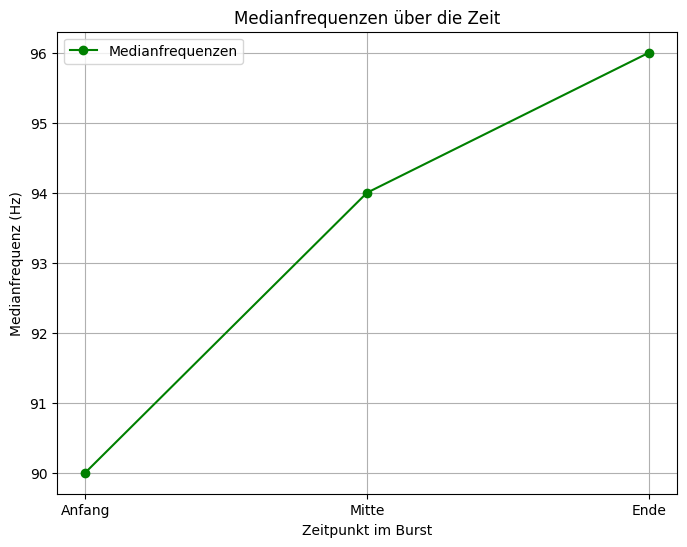

In [452]:

# Medianfrequenzen über die Zeit
median_frequencies = [median_freq_start, median_freq_middle, median_freq_end]
time_points = ['Anfang', 'Mitte', 'Ende']

plt.figure(figsize=(8, 6))
plt.plot(time_points, median_frequencies, marker='o', color='green', label='Medianfrequenzen')
plt.title('Medianfrequenzen über die Zeit')
plt.xlabel('Zeitpunkt im Burst')
plt.ylabel('Medianfrequenz (Hz)')
plt.grid()
plt.legend()
plt.show()